<a href="https://colab.research.google.com/github/pylabview/ML_Drug_Treatment/blob/main/Drug_Treatment_(Rodrigo_Arguello_Serrano).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Belt Exam 2 - Data Science - Drug Treatment
Rodrigo Arguello-Serrano

>This first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

<a name="TOC"></a>
#🗂  Table of Contents
1. [🖌 Source Control and Data Cleaning](#1)
  - [📒 Data Dictionary ](#1.1)
  - [Module Imports & Mounting Goolgle Drive](#1.2)  
  - [🐍 Helper Functions](#1.1.1)
  - [Loading Data](#1.3)
  - [🧽 Data Cleaning](#1.4)
2. [📊 Exploratory Data](#3)
  - [🐍 Plot Functions](#3.1.1)
  - [EDA Numerical Columns (Histograms & Boxes)](#3.2)
  - [EDA Categorical Columns (Barplots)](#3.3)
  - [Heat Map (Correlated Features)](#3.5)
3. [📊 Explanatory Visuals & Analysis](#4)
4. [⚙️ Preprocesing for Machine Learning](#5)
  - [Check for duplicates, missing values, errors](#5.2)
  - [Split the Data (Validation Split)](#5.3)
  - [Column Selector](#5.4)
  - [Transformers](#5.5)
  - [Pipeline Numeric Data and a Pipeline for Categorical Data](#5.6)
  - [Tuples](#5.7)
  - [ColumnTransformer & Preprocessing](#5.8)
  - [Transform Both Training and Testing Data](#5.9)
5. [📐Maching Learning - Training the Models](#6)
  - [🐍 Functions](#6.1)
  - [▶ Model Data: LogisticRegression](#6.2)
    - [Fit a LogisticRegression model](#6.2.1)
    - [Evaluating Our Model](#6.2.2)
    - [Changing Decision Thresholds](#6.2.3)
    - [Comparing Confusion Matrices](#6.2.4)
    - [Loop Over Decision Thresholds](#6.2.5)
  - [▶ Model Data: KNN model](#6.3)
    - [Tune the Hyperparameters](#6.3.1)
  - [▶ Model Data: Ramdom Forest Model](#6.9)
    - [Loop to Tune n_estimators for Random Forest Regressor Model](#6.10)
6. [📕 Observations and Recommendations](#6.14)




<a name="1"></a>
Source Control and Data Cleaning

⬅️[Go back to TOC](#TOC)

Source

[Dataset](https://drive.google.com/file/d/15biox33F9uTNuGvYs45_kc1UOBavckMY/view)

Part 2

We will be performng the following activities:

- Number of rows and columns.
- Dataframe datatypes of each variable.
- Removing duplicates.
- Identify missing values.
- Define strategy to address missing values.
- Confirm that there are no missing values after addressing them.
- Find and fix any inconsistent categories of data.
- For any numerical columns, obtain the summary statistics of each (min, max, mean).

<a name="1.1"></a>
###📒 Data Dictionary
| Column Name | Data type | description                            |
| ----------- | --------- | -------------------------------------- |
| Drug        | Object    | Type of Drug (drugQ, drugZ) (target)   |
| Age         | Float     | Age of patient                         |
| Gender      | Object    | M (male) or F (female)                 |
| BP          | Object    | Blood pressure levels (normal or high) |
| Cholesterol | Object    | Cholesterol levels (normal or high)    |
| Na_to_K     | Float     | Sodium to Potassium ratio in blood     |



<a name="1.2"></a>
## Module Imports & Mounting Goolgle Drive

In [1]:
# imports
# Pandas
import pandas as pd
# Numpy
import numpy as np

# MatPlotLib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

#Typing Checks
from IPython.core.magics.script import List

#To print dicts formatted
import pprint

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, classification_report,
                             precision_score)


#Mount Google drive
from google.colab import drive

#Setting plots styles
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
#Moubt Gogle Drive
drive.mount('/content/drive')

<ipython-input-1-333878ab58b4>:59: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-1-333878ab58b4>:59: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


Mounted at /content/drive


<a name="1.1.1"></a>
## 🐍 Helper Functions

In [2]:
#Finding duplicates function with pretty print
#Also removes dups in place!
def find_dups(df, drop_dups=True):
  dups_count = df.duplicated().sum()
  if dups_count == 0:
    print('There are no duplicates!!!')
  else:
    print(f'There are {dups_count} duplicate rows.')

  if dups_count != 0 and drop_dups:
    df.drop_duplicates(inplace=True)
    print(f'There are ZERO duplicate rows (Verification).')

In [3]:
#Find missing values accros all features
#with pretty print: Col name , percentage and data type
def get_missing_values(df):
  print(f"Total Rows: {df.shape[0]}, num of features: {df.shape[1]-1}, and one Target column")
  miss_series = df.isna().sum()
  types_series = df.dtypes
  col = miss_series.index
  for i,v in enumerate(miss_series):
    if not v==0:
      print(f'''{col[i]}:{v}, total %{(v/df.shape[0])*100:.3f} of missing values -->{types_series[i]}''')

In [4]:
#Getting numeric columns
# retrun a list
def get_num_cols(df,type_list:List = ['float64','int64']):
  series_type = df.dtypes
  iseries = series_type.index
  n_col_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name in type_list:
      n_col_list.append(iseries[i])
  return n_col_list

In [5]:
#Getting categorical columns
# retrun a list
def get_cat_cols(df):
  # Column Types accepted
  series_type = df.dtypes
  iseries = series_type.index
  n_obj_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name == 'object':
      n_obj_list.append(iseries[i])
  return n_obj_list

In [6]:
# Python Dictionary Pretty Print
def pretty_print_dict(seq):
  if isinstance(seq,dict):
    pprint.pprint(seq)
  else:
    print("Not a dictionary")

In [7]:
#Function to explore data inconsistencies
#Preety print of cat columns value counts!
def cat_columns_eda(df):
  # select only object columns
  categoricals = df.select_dtypes(include='object')

  # check value counts for each object column
  for col in categoricals.columns:
    print(f"Column name: ****{col}****")
    print(categoricals[col].value_counts(), '\n')

<a name="1.3"></a>
## Loading Data

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/Belt2_A_drugtype_v2_final.csv")
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [10]:
get_missing_values(df)

Total Rows: 296, num of features: 5, and one Target column
Age:59, total %19.932 of missing values -->float64
BP:75, total %25.338 of missing values -->object


In [ ]:
find_dups(df)

There are 15 duplicate rows.
There are ZERO duplicate rows (Verification).


In [ ]:
cat_columns_eda(df)

Column name: ****Gender****
M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64 

Column name: ****BP****
High      128
Normal     46
Low        32
Name: BP, dtype: int64 

Column name: ****Cholesterol****
HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64 

Column name: ****Na_to_K****
12.766    7
12.307    6
11.009    6
11.198    6
12.854    6
         ..
8.107     1
10.443    1
11.455    1
16.347    1
12.879    1
Name: Na_to_K, Length: 183, dtype: int64 

Column name: ****Drug****
drugZ    147
drugQ    134
Name: Drug, dtype: int64 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    object 
 5   Drug         281 non-null    object 
dtypes: float64(1), object(5)
memory usage: 15.4+ KB


<a name="1.4"></a>
## 🧽 Data Cleaning

In [ ]:
# 4) Identify missing values.
get_missing_values(df)

Total Rows: 281, num of features: 5, and one Target column
Age:54, total %19.217 of missing values -->float64
BP:75, total %26.690 of missing values -->object


In [ ]:
#Check for inconsistencies
cat_columns_eda(df)

Column name: ****Gender****
M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64 

Column name: ****BP****
High      128
Normal     46
Low        32
Name: BP, dtype: int64 

Column name: ****Cholesterol****
HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64 

Column name: ****Na_to_K****
12.766    7
12.307    6
11.009    6
11.198    6
12.854    6
         ..
8.107     1
10.443    1
11.455    1
16.347    1
12.879    1
Name: Na_to_K, Length: 183, dtype: int64 

Column name: ****Drug****
drugZ    147
drugQ    134
Name: Drug, dtype: int64 



> There are inconsistencies en `Gender` and `Cholesterol`

In [ ]:
#Repalcing inconsisten values in 'Gender': 'amle', 'Male', 'Female', 'female',
#'Femal', and 'femal'
df.replace({'male': 'M',
            'Male': 'M',
            'female':'F',
            'Female':'F',
            'femal':'F',
            'Femal':'F',}, inplace = True)

In [ ]:
#Repalcing inconsisten values in 'Cholesterol': 'HIGH', 'NORMAL', 'NORM', and 'norm'
df.replace({'HIGH': 'high',
            'NORMAL': 'normal',
            'norm':'normal',
            'NORM':'normal',},
            inplace = True)

In [ ]:
# Checking if we are OK!
df['Gender'].value_counts()

M    145
F    136
Name: Gender, dtype: int64

In [ ]:
# Checking if we are OK!
df['Cholesterol'].value_counts()

high      152
normal    129
Name: Cholesterol, dtype: int64

>Yes! we are OK! No more inconsistencies

>We are replacing The target column values by drugQ --> 0 and drugZ --> 1

In [ ]:
df.replace({'drugQ': 0,
            'drugZ': 1,},
            inplace = True)

In [ ]:
#Checking balance
df['Drug'].value_counts()

1    147
0    134
Name: Drug, dtype: int64

> Perfect balance! 50%! for each drug

In [ ]:
# Are there duplicates? If so, drop any duplicates.
find_dups(df)

There are no duplicates!!!


In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
#CHeck for abnormalities
df.describe()

,Age,Drug
count,227.000000,281.000000
mean,47.475771,0.523132
std,38.359652,0.500356
min,15.000000,0.000000
25%,32.000000,0.000000
50%,45.000000,1.000000
75%,59.000000,1.000000
max,570.000000,1.000000


> The feature 'Age' have an abnormal value: max 570. This shold be wrong

In [ ]:
#Checking the index for value 570
df[(df['Age']>100)]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,F,Normal,high,14.216,1


In [ ]:
df[(df['Age']>100)]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,F,Normal,high,14.216,1


In [ ]:
#droping row index 232
df = df.drop(index=232)

In [ ]:
#Checking again
df.describe()

,Age,Drug
count,226.000000,280.000000
mean,45.163717,0.521429
std,16.098439,0.500435
min,15.000000,0.000000
25%,32.000000,0.000000
50%,44.500000,1.000000
75%,58.750000,1.000000
max,74.000000,1.000000


In [ ]:
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K         object
Drug             int64
dtype: object

> The Sodium to Potassium ratio in blood has the wrong type. It should be float based on dataset dictionary

In [ ]:
df['Na_to_K'].astype(float)

ValueError: ignored

In [ ]:
#Repalcing abnormal value '10.403_'
df.replace({'10.403_':10.403},inplace=True)

In [ ]:
# Converting 'Na_to_K' column to float
df['Na_to_K'] = df['Na_to_K'].astype(float)

In [ ]:
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K        float64
Drug             int64
dtype: object

In [ ]:
#Checking again
df.describe()

,Age,Na_to_K,Drug
count,226.000000,280.000000,280.000000
mean,45.163717,14.865079,0.521429
std,16.098439,6.486304,0.500435
min,15.000000,6.269000,0.000000
25%,32.000000,10.446000,0.000000
50%,44.500000,12.856000,1.000000
75%,58.750000,17.207250,1.000000
max,74.000000,38.247000,1.000000


> Everything looks good!

<a name="3"></a>
# 📊 Exploratory Data

⬅️[Go back to TOC](#TOC)

>The goal of this third part  is to understand the data as it relates to the best Drug Type treatment for high-risk patients. I will complete any statistical analyses that might help you to understand, explain, or model the dataset. The following is inckuded:

>- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


<a name="3.1.1"></a>
## 🐍 Plot Functions

⬅️[Go back to TOC](#TOC)

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_numeric_box(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=1, figsize=(10,5))

  # sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()

  med_value = df[col].median()


  axes.axvline(mean_value,color='slategray', ls='--', lw=3,
            label=f"Mean {col} = {mean_value:,.2f}");

  axes.axvline(med_value,color='skyblue', ls=':', lw=3,
            label=f"Median {col} = {med_value:,.2f}");
  ## Use seaborn
  sns.boxplot(data=df, x = col)

  axes.spines['right'].set_visible(False)
  axes.spines['top'].set_visible(False)
  ## Updating title of top graph
  axes.set_title(f'EDA for {col}',y=1.1)
  axes.legend()
  ## Fixing any overlapping labels and showing
  return fig,axes

In [ ]:
## Creating a BETTER version of our function with fancy price ticks
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x,y,figsize=(10,5),format_price=True,
              despine=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=data,x=x,ax=ax)
    ax.set_title(f'Distribution of {y}',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean_price = data[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = {mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = {med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')



    ## if format_price is True use our FuncFormatter
    if format_price:

        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ## add a legend
    ax.legend()

    return fig,ax

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [ ]:
# Checking num columna
print(f"Numerical column: {get_num_cols(df)[:-1]}")
print("Drug column is the target")



Numerical column: ['Age', 'Na_to_K']
Drug column is the target


- For each numeric feature, we will plot the distribution and a boxplot.

<a name="3.2"></a>
## EDA Numerical Columns (Histograms & Boxes)

⬅️[Go back to TOC](#TOC)

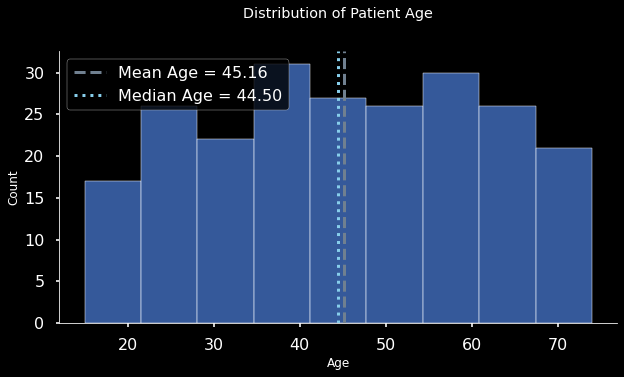

In [ ]:
plot_dist(df,'Age','Patient Age',format_price=False);

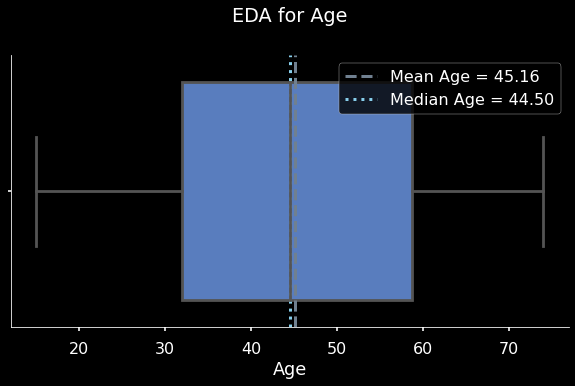

In [ ]:
plot_numeric_box(df,'Age');

> There are no outliers. The only one (index=232, value=570) was previously removed)

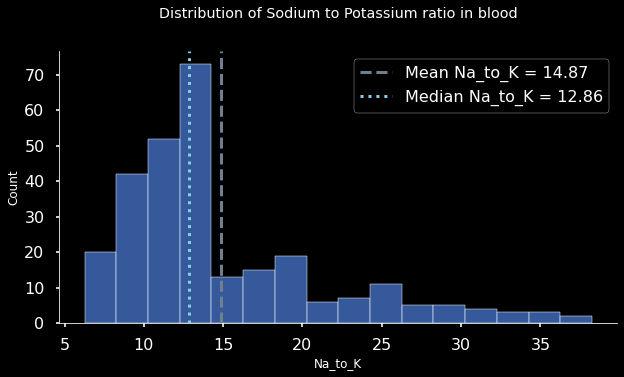

In [ ]:
plot_dist(df,'Na_to_K','Sodium to Potassium ratio in blood',format_price=False);

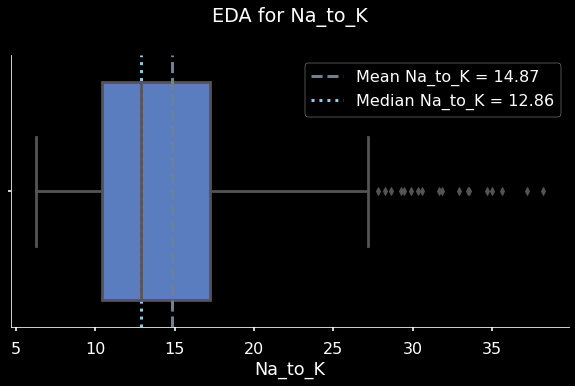

In [ ]:
plot_numeric_box(df,'Na_to_K');

> The Sodium to Potassium ratio in blood shows some outliers after 25. The 75% is between 10 and 17

<a name="3.3"></a>
## EDA Categorical Columns (Barplots)
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot.

⬅️[Go back to TOC](#TOC)

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [ ]:
print(f"The dataset cat columns are:{get_cat_cols(df)}")

The dataset cat columns are:['Gender', 'BP', 'Cholesterol']


M    145
F    135
Name: Gender, dtype: int64


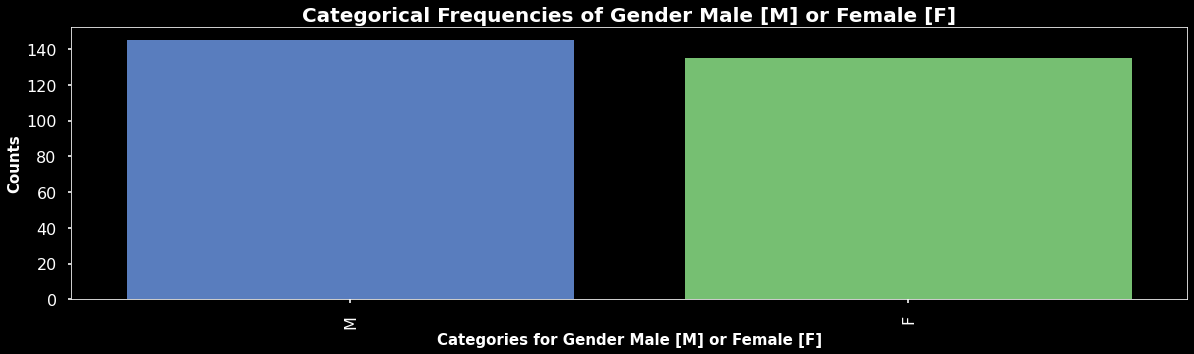

In [ ]:
fig, ax = plot_bar(df, 'Gender', 'Gender Male [M] or Female [F]');
print(df['Gender'].value_counts())

> Number of Males are Females are pretty much the same

High      128
Normal     45
Low        32
Name: BP, dtype: int64


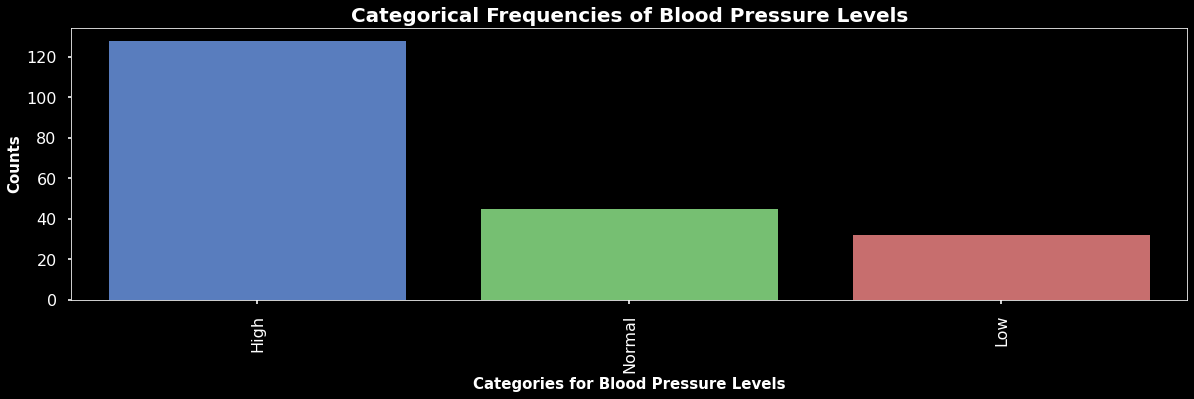

In [ ]:
fig, ax = plot_bar(df, 'BP', 'Blood Pressure Levels');
print(df['BP'].value_counts())

> The patients with High Blood Pressure are significantly higher, which would indicate an effect in the best drug for them.

high      151
normal    129
Name: Cholesterol, dtype: int64


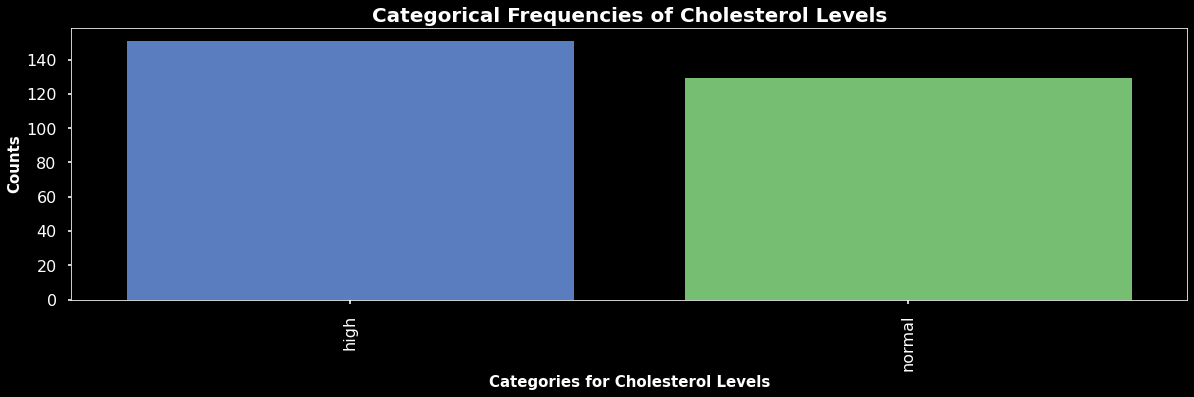

In [ ]:
fig, ax = plot_bar(df, 'Cholesterol', 'Cholesterol Levels');
print(df['Cholesterol'].value_counts())

> The number of patients with high Cholesterol levels are slightly higher than the normal ones

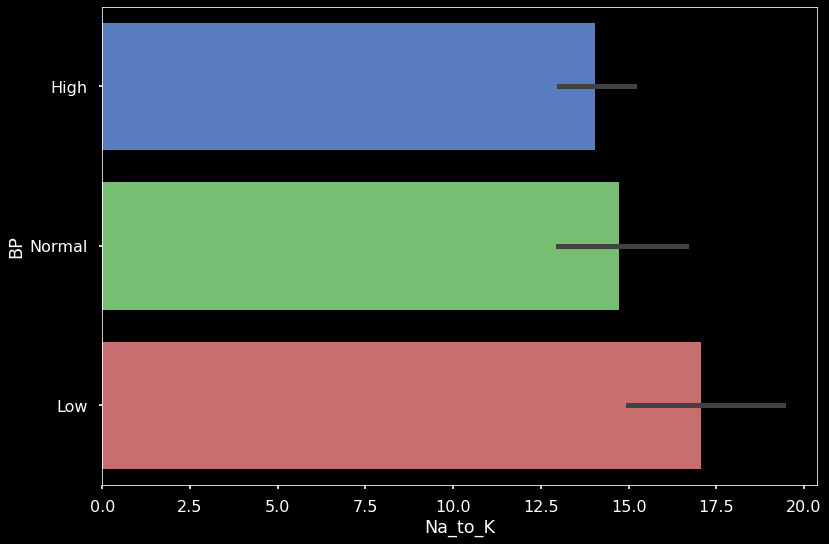

In [ ]:
# Barplot with seaborn
sns.barplot(data=df, y='BP', x='Na_to_K');

> Low BP has a higher sodium level, contrasting with High blood pressure.

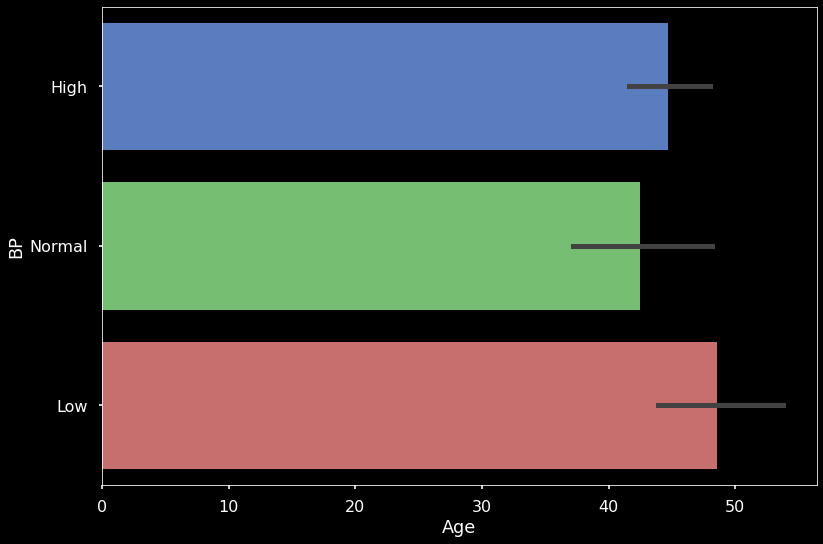

In [ ]:
# Barplot with seaborn
sns.barplot(data=df, y='BP', x='Age');

> No significant differnece for patients avore 40 years

> The Fat Content doesn't have any influence in the the Outlets Sales

Seafood and Starchy have higher Sales, and baking & Soft has lowest

<a name="3.4"></a>
## Heat Map (Correlated Features)

⬅️[Go back to TOC](#TOC)

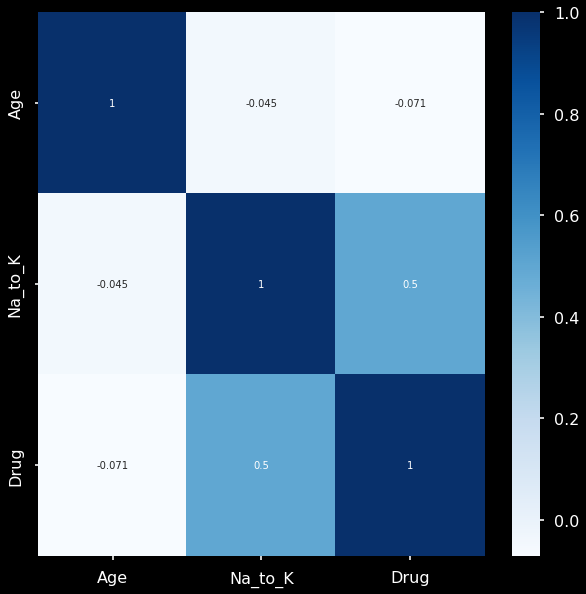

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There is a moderate correlatiom between the Drug and the Sodium to Potassium ratio in blood

<a name="4"></a>
# 📊 Project 1 - Part 4: Explanatory Visuals & Analysis

⬅️[Go back to TOC](#TOC)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          226 non-null    float64
 1   Gender       280 non-null    object 
 2   BP           205 non-null    object 
 3   Cholesterol  280 non-null    object 
 4   Na_to_K      280 non-null    float64
 5   Drug         280 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.4+ KB


4.1 Which products sell the most?

In [ ]:
Item_means = df.groupby(['Gender'])['Na_to_K'].mean().sort_values(ascending=False)
Item_means

Gender
F    15.597467
M    14.183200
Name: Na_to_K, dtype: float64

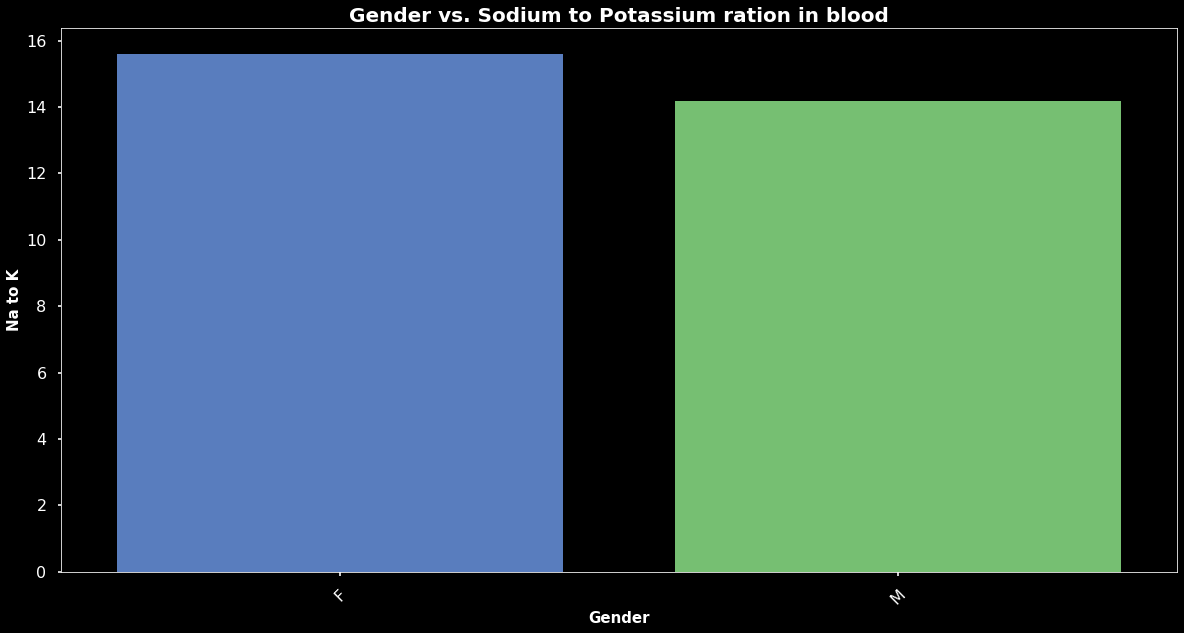

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Gender', y = 'Na_to_K', order = Item_means.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Gender vs. Sodium to Potassium ration in blood', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Gender', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Na to K', fontsize = 15, fontweight = 'bold');




>Starchy and Seafood has the better sales, Baking and other the lowest

4.2 Which products sell the most by fat content?

In [ ]:
Fat_means = df.groupby('BP')['Age'].mean().sort_values(ascending=False)
Fat_means

BP
Low       48.555556
High      44.702970
Normal    42.485714
Name: Age, dtype: float64

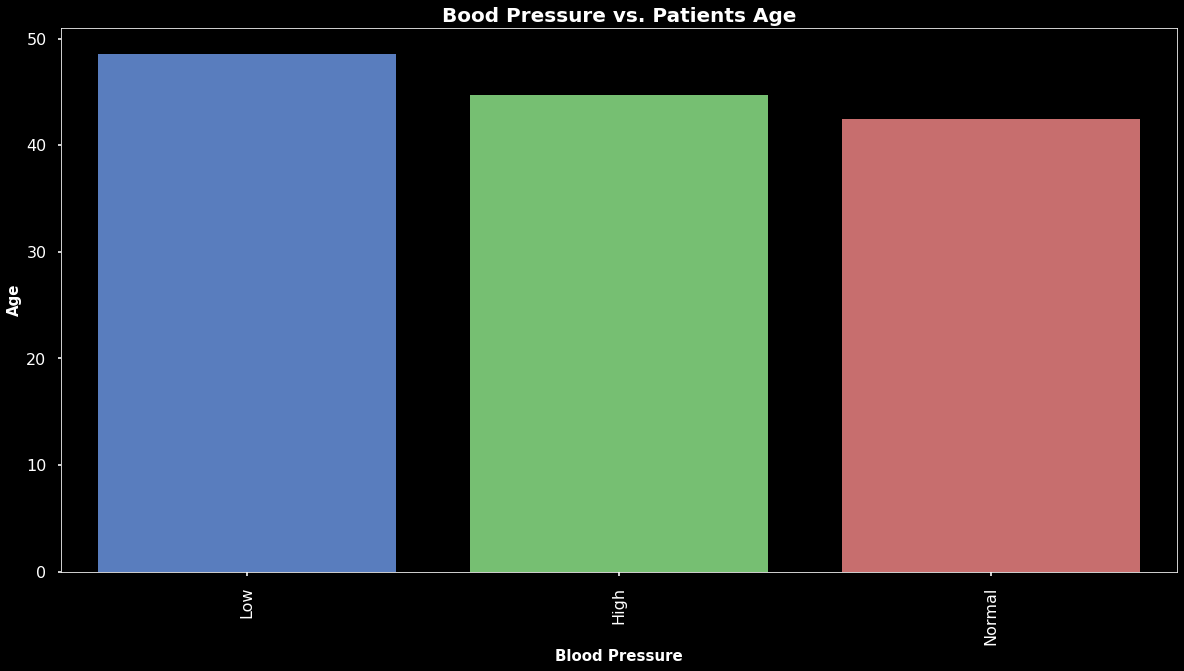

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='BP', y = 'Age', order = Fat_means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Bood Pressure vs. Patients Age', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Blood Pressure', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Age', fontsize = 15, fontweight = 'bold');


>The patients over 40 has same mix of blood pressure

> Because there is no clear correlation between Age and the other features(approx. 20% missing values), I am dropping this column.

In [ ]:
df.drop('Age', axis=1, inplace=True)

<a name="5"></a>
# ⚙️ Preprocesing for Machine Learning

⬅️[Go back to TOC](#TOC)

In [ ]:
# Make a copy of original df to avoid any manipulations
ml_df = df.copy()

<a name="5.2"></a>
## Check for duplicates, missing values, errors

In [ ]:
# Check for missing values before splitting and validating sataset
get_missing_values(ml_df)

Total Rows: 280, num of features: 4, and one Target column
BP:75, total %26.786 of missing values -->object


> For Blood Pressure categorical features, the imputer strategy will be most frequent, as High BP are the majority of patients

In [ ]:
# Checking duplicates values again
find_dups(ml_df)

There are 59 duplicate rows.
There are ZERO duplicate rows (Verification).


<a name="5.3"></a>
## Split the Data (Validation Split)

In [ ]:
X = ml_df.drop('Drug', axis=1).copy()
y = ml_df['Drug'].copy()

labels=['drugQ', 'drugZ']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [ ]:
X_train

,Gender,BP,Cholesterol,Na_to_K
209,M,High,normal,11.343
57,F,High,high,10.977
234,M,Normal,normal,10.832
81,F,High,normal,25.974
80,M,High,normal,28.294
...,...,...,...,...
169,M,High,normal,10.446
91,F,Normal,high,19.675
252,F,High,normal,31.876
152,M,NaN,normal,12.766


<a name="5.4"></a>
## Column Selector

⬅️[Go back to TOC](#TOC)

In [ ]:
get_cat_cols(ml_df)

['Gender', 'BP', 'Cholesterol']

In [ ]:
get_num_cols(ml_df)[:-1]

['Na_to_K']

Identifying features (Numerical, Categorical)
- Numerical: `'Na_to_K'`

- Categoricals:
  - Nominals: `'Gender'` --> One-Hot Encoding
  - Ordinal: `'BP', 'Cholesterol'` --> Ordinal Endocing

Missing Values inputer strategy:
>For Blood Pressure categorical features, the imputer strategy will be most frequent, as the majority of patients have high blood pressure.


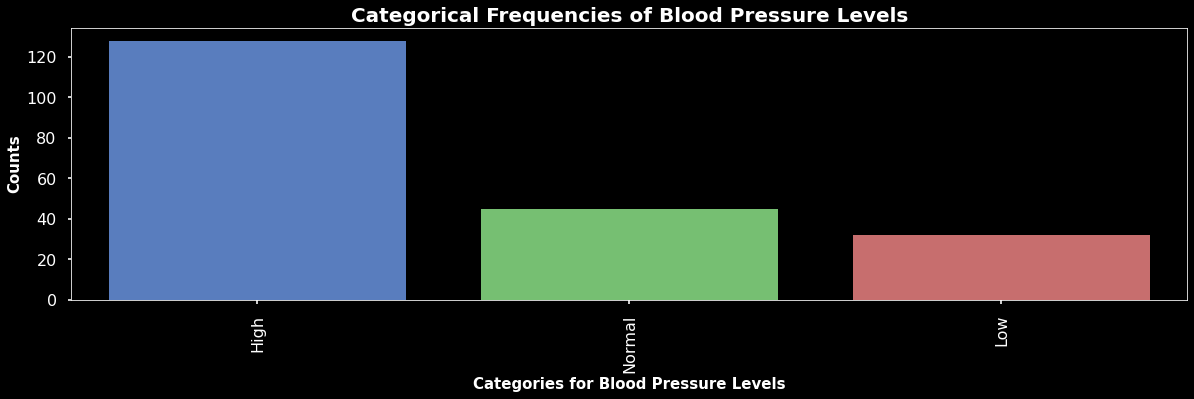

<a name="5.5"></a>
## **Transformers**

⬅️[Go back to TOC](#TOC)

In [ ]:
cat_columns_eda(ml_df)

Column name: ****Gender****
M    115
F    106
Name: Gender, dtype: int64 

Column name: ****BP****
High      78
Normal    45
Low       32
Name: BP, dtype: int64 

Column name: ****Cholesterol****
normal    115
high      106
Name: Cholesterol, dtype: int64 



In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

freq_imputer = SimpleImputer(strategy='most_frequent')

bp_labels = ['Low','Normal', 'High']
cholesterol_labels = ['normal','high']
#combine the ordered list in the order that the columns appear
ordered_labels = [bp_labels, cholesterol_labels]

#handle_unknown is 'error' by default.  That's a good place to start
#but it may cause problems in a production model.
ordinal = OrdinalEncoder(categories = ordered_labels)

<a name="5.6"></a>
## Pipeline Numeric Data and a Pipeline for Categorical Data

⬅️[Go back to TOC](#TOC)

In [ ]:
# Setup the pipelines for the numeric and categorical data
num_pipeline = make_pipeline(scaler)
ord_pipeline = make_pipeline(freq_imputer, ordinal)
nom_pipeline = make_pipeline(ohe)

<a name="5.7"></a>
## **Tuples**

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create column lists for objects and a number selector
ordinal_cols = ['BP', 'Cholesterol']
nominal_cols = ['Gender']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the make column selectors
numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

<a name="5.8"></a>
## ColumnTransformer & Preprocessing

⬅️[Go back to TOC](#TOC)

In [ ]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(ordinal_tuple,
                                          numeric_tuple,
                                          nominal_tuple,
                                          remainder='drop')

In [ ]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'High'],
                                                                             ['normal',
                                                                              'high']]))]),
                                 ['BP', 'Cholesterol']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f04653223d0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Gender'])])

<a name="5.9"></a>
## Transform Both Training and Testing Data

⬅️[Go back to TOC](#TOC)

In [ ]:
# Transform the X_train and the X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed[:5]

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (165, 5)




array([[ 2.        ,  0.        , -0.62381314,  0.        ,  1.        ],
       [ 2.        ,  1.        , -0.67586911,  1.        ,  0.        ],
       [ 1.        ,  0.        , -0.69649238,  0.        ,  1.        ],
       [ 2.        ,  0.        ,  1.45714575,  1.        ,  0.        ],
       [ 2.        ,  0.        ,  1.78711805,  0.        ,  1.        ]])

<a name="6"></a>
# 📐Maching Learning - Training the Models

⬅️[Go back to TOC](#TOC)

> I am considering this problem as a classification type because the target column has only two values: drugQ and drugZ.

>evaluate_classiffication Function<br>


- Let's combine the model evaluation steps for classification models into a new function called `evaluate_classification`.

- The function should have the following arguments:
  - model
  - X_test
  - y_test
  - + any other plot customization options.

- Inside the function, it will:
  - Print a header with a label indicating if we are evaluating Training Data or Test data.

  - Get the predictions for X_test from the model.
  - Get and print a classification_report
  - Create a figure with 2 subplots:
    - a Confusion Matrix
    - a ROC Curve Display




In [ ]:
def evaluate_classiffication(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens'):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get Predictions
    y_pred = model.predict(X_test)

   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()


<a name="6.2"></a>
## ▶ Model Data: LogisticRegression

⬅️[Go back to TOC](#TOC)

<a name="6.2.1"></a>
### Fit a LogisticRegression model

In [ ]:
# fit model
lgr_pipe = make_pipeline(preprocessor, LogisticRegression())
lgr_pipe.fit(X_train, y_train)

# get predictions
train_preds = lgr_pipe.predict(X_train)
test_preds = lgr_pipe.predict(X_test)

train_preds[:5]

array([0, 0, 1, 1, 1])

<a name="6.2.2"></a>
### Evaluating Our Model

In [ ]:
# print the classiffication report from the test data
print(classification_report(y_test, test_preds, target_names=labels ))

              precision    recall  f1-score   support

       drugQ       0.92      1.00      0.96        22
       drugZ       1.00      0.94      0.97        34

    accuracy                           0.96        56
   macro avg       0.96      0.97      0.96        56
weighted avg       0.97      0.96      0.96        56



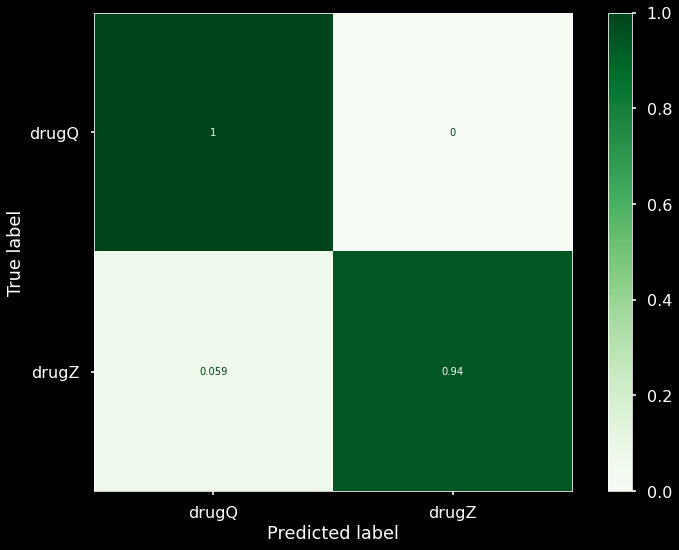

In [ ]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
               normalize='true', display_labels=labels, cmap='Greens');

<a name="6.2.3"></a>
### Changing Decision Thresholds

⬅️[Go back to TOC](#TOC)

In [ ]:
# Get the predicted probabilities instead of predicted classes
train_probs = lgr_pipe.predict_proba(X_train)
test_probs = lgr_pipe.predict_proba(X_test)

train_probs[:5]

array([[0.65790256, 0.34209744],
       [0.7062034 , 0.2937966 ],
       [0.09607692, 0.90392308],
       [0.03318634, 0.96681366],
       [0.02120797, 0.97879203]])

- What if we used a probability threshold of 0.4 instead of the default (0.5)?

In [ ]:
thresh = 0.40

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

print(f'Predictions with the default decision threshold of .5')
print(train_preds[:5], '\n')

print(f'Predictions with a decision threshold of {thresh}')
print(train_thresh[:5], '\n')

print('True Labels')
print(y_train[:5].values)

Predictions with the default decision threshold of .5
[0 0 1 1 1] 

Predictions with a decision threshold of 0.4
[0, 0, 1, 1, 1] 

True Labels
[0 0 1 1 1]


⬅️[Go back to TOC](#TOC)

<a name="6.2.4"></a>
### Comparing Confusion Matrices

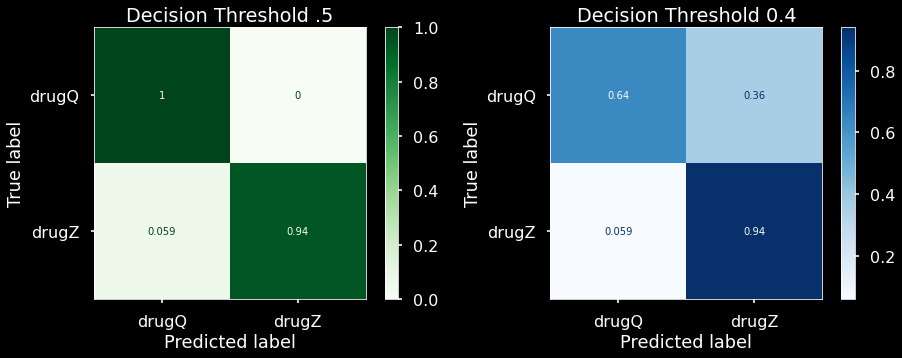

In [ ]:
# plot confusion matrix for both .5 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
               normalize='true', display_labels=labels,  cmap='Greens',
               ax=axes[0])
axes[0].set_title('Decision Threshold .5')


ConfusionMatrixDisplay.from_predictions(y_test, test_thresh,
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh}');

<a name="6.2.5"></a>
### Loop Over Decision Thresholds

⬅️[Go back to TOC](#TOC)

- Let's check our model's accuracy for 20 different probabiltiy thresholds and compare.

In [ ]:
# Create an array of 20 thesholds to use
thresholds = np.array(range(0,105,5)) / 100
thresholds[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Text(0, 0.5, 'Accuracy Score')

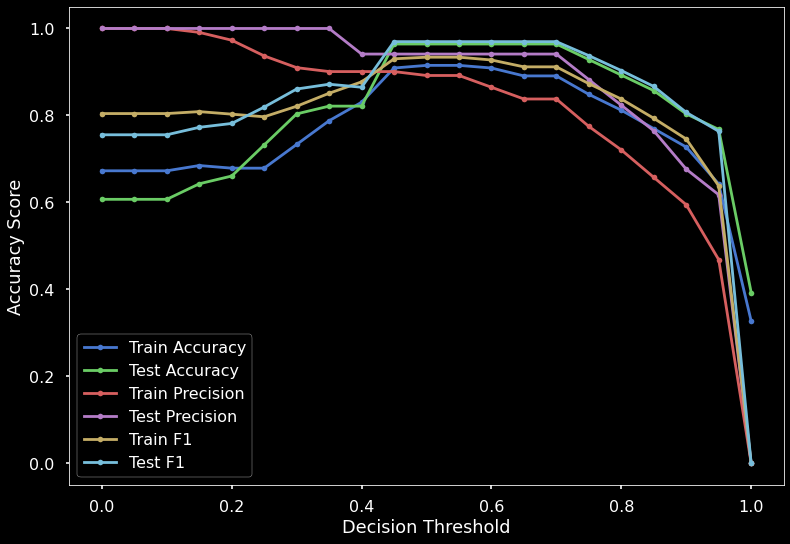

In [ ]:
score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy','Test Accuracy','Train Precision','Test Precision','Train F1','Test F1'])

## for each threshold:
for thresh in thresholds:

  ## Get the predicted classes for training and test data
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  ## Save the Training and test accuracy scores to the score_df
  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

  score_df.loc[thresh, 'Train Precision'] = precision_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Precision'] = precision_score(test_thresh, y_test)

  score_df.loc[thresh, 'Train F1'] = f1_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test F1'] = f1_score(test_thresh, y_test)

## Plot the results
score_df.plot(marker='.')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [ ]:
df['Drug'].value_counts(normalize=True)

1    0.521429
0    0.478571
Name: Drug, dtype: float64

In [ ]:
score_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1,Test F1
0.50,0.915152,0.964286,0.891892,0.941176,0.933962,0.969697
0.45,0.909091,0.964286,0.900901,0.941176,0.930233,0.969697
0.70,0.890909,0.964286,0.837838,0.941176,0.911765,0.969697
0.65,0.890909,0.964286,0.837838,0.941176,0.911765,0.969697
0.60,0.909091,0.964286,0.864865,0.941176,0.927536,0.969697
0.55,0.915152,0.964286,0.891892,0.941176,0.933962,0.969697
0.75,0.848485,0.928571,0.774775,0.882353,0.873096,0.9375
0.80,0.812121,0.892857,0.720721,0.823529,0.837696,0.903226
0.85,0.769697,0.857143,0.657658,0.764706,0.793478,0.866667
0.35,0.787879,0.821429,0.900901,1.0,0.851064,0.871795


> Best Accuracy performance @ 0.5
<br>
   - Train: 0.915152
   - Test: 0.964286
>

<a name="6.3"></a>
##▶ Model Data: KNN Model

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['normal',
                                                                                               'high']]))]),
                                                  ['BP', 'Cholesterol']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f04653223d0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.97      0.94      0.96        34

    accuracy                           0.95        56
   macro avg       0.94      0.95      0.94        56
weighted avg       0.95      0.95      0.95        56



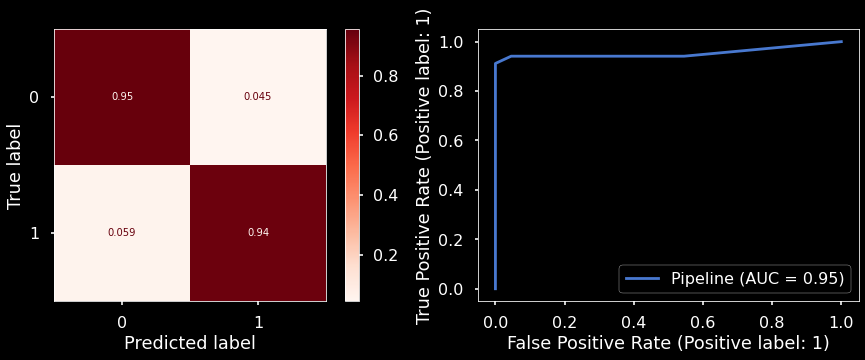

In [ ]:
# fit and evaluate a KNeighborsClassifier
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data')

<a name="6.3.1"></a>
### **Tune the Hyperparameters**

In [ ]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Low',
                                                                                 'Normal',
                                                                                 'High'],
                                                                                ['normal',
                                                                                 'high']]))]),
                                    ['BP', 'Cholesterol']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('standardscaler',
                               

In [ ]:
# Tune K utilizing a loop.
krange = range(1, 20)
k_list = []
for k in krange:
  knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

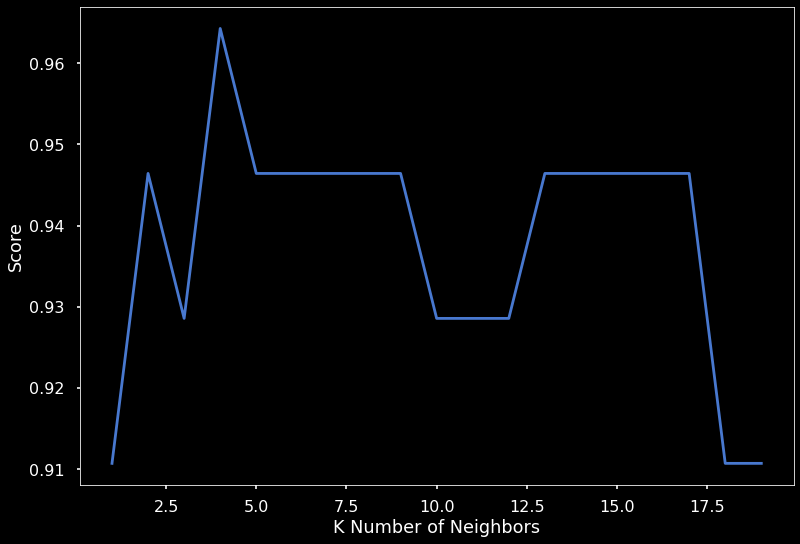

In [ ]:
# Visualize Accuracy Scores.
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score');

⬅️[Go back to TOC](#TOC)

In [ ]:
from multiprocessing import process
# Create an instance of the best model
knn = KNeighborsClassifier(n_neighbors=4)
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['normal',
                                                                                               'high']]))]),
                                                  ['BP', 'Cholesterol']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f04653223d0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.94      0.97        34

    accuracy                           0.96        56
   macro avg       0.96      0.97      0.96        56
weighted avg       0.97      0.96      0.96        56



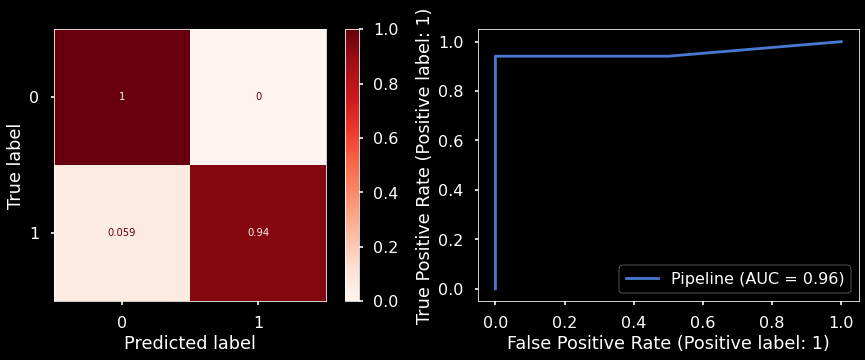

In [ ]:
# fit and evaluate a KNeighborsClassifier Test
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        54
           1       1.00      0.88      0.94       111

    accuracy                           0.92       165
   macro avg       0.90      0.94      0.92       165
weighted avg       0.94      0.92      0.92       165



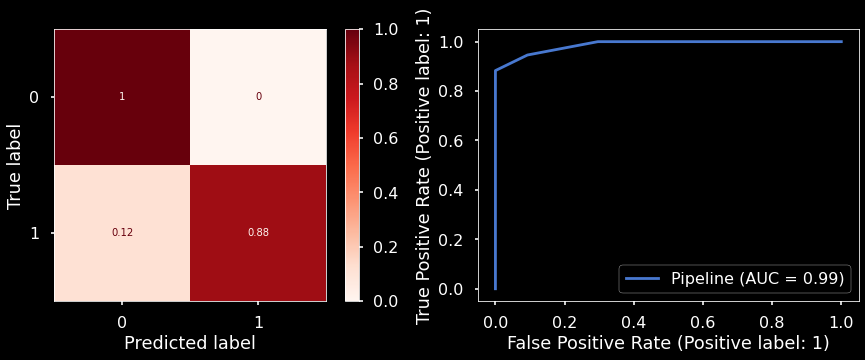

In [ ]:
# fit and evaluate a KNeighborsClassifier for Train
evaluate_classiffication(knn_pipe,X_train,y_train, cmap='Reds',
                         label='KNN - Train Data')

<a name="6.9"></a>
##▶ Model Data: Ramdom Forest Model

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create an instance of the model
rdf = RandomForestClassifier()
# Create a model pipeline
rdf_pipe = make_pipeline(preprocessor, rdf)
# Fit the model
rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['normal',
                                                                                               'high']]))]),
                                                  ['BP', 'Cholesterol']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f04653223d0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
# Save the model's predictions for the train dataset
rdf_train_preds = rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
rdf_test_preds = rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.91      0.94      0.93        34

    accuracy                           0.91        56
   macro avg       0.91      0.90      0.91        56
weighted avg       0.91      0.91      0.91        56



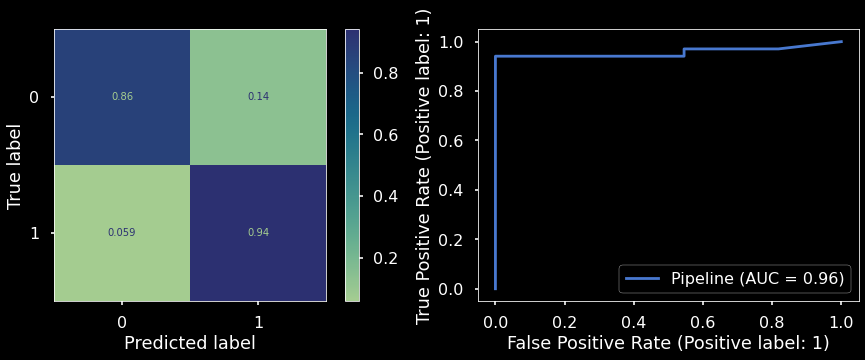

In [ ]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_test,y_test, cmap='crest',
                         label='Random Forest - Test Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       111

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



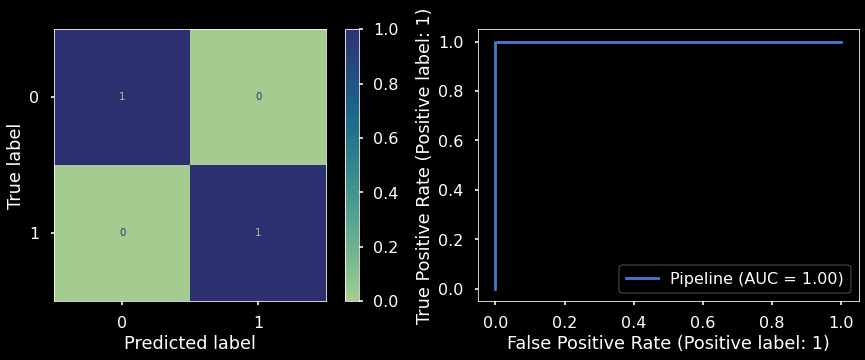

In [ ]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_train,y_train, cmap='crest',
                         label='Random Forest - Train Data')

<a name="6.10"></a>
### Loop to Tune n_estimators for Random Forest Regressor Model

In [ ]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestClassifier(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [ ]:
scores

,Train,Test
50,1.0,0.625668
100,1.0,0.625668
200,1.0,0.625668
300,1.0,0.625668
400,1.0,0.625668
500,1.0,0.625668
600,1.0,0.625668
700,1.0,0.625668
800,1.0,0.625668
1000,1.0,0.625668


⬅️[Go back to TOC](#TOC)

In [ ]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

50

In [ ]:
# Create an instance of the model
best_rdf = RandomForestClassifier(n_estimators= best_estimators)
# Create a model pipeline
best_rdf_pipe = make_pipeline(preprocessor, best_rdf)
# Fit the model
best_rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['normal',
                                                                                               'high']]))]),
                                                  ['BP', 'Cholesterol']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f04653223d0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50))])

In [ ]:
# Save the model's predictions for the train dataset
best_rdf_train_preds = best_rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
bets_rdf_test_preds = best_rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.94      0.94      0.94        34

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56



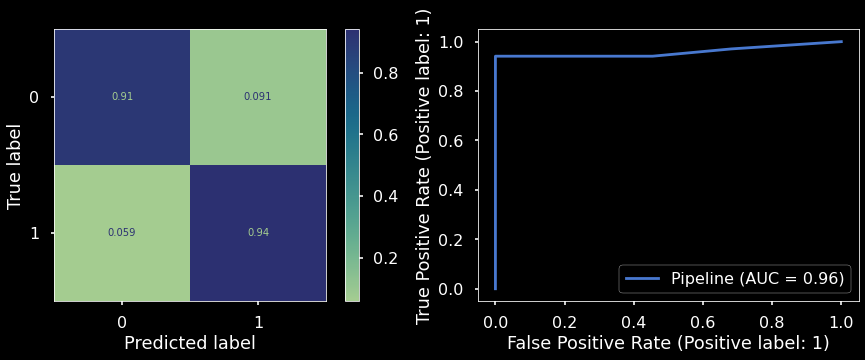

In [ ]:
# fit and evaluate a Random Forest Test Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_test,y_test, cmap='crest',
                         label='Best N-Estimator - Random Forest - Test Data')

⬅️[Go back to TOC](#TOC)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       111

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



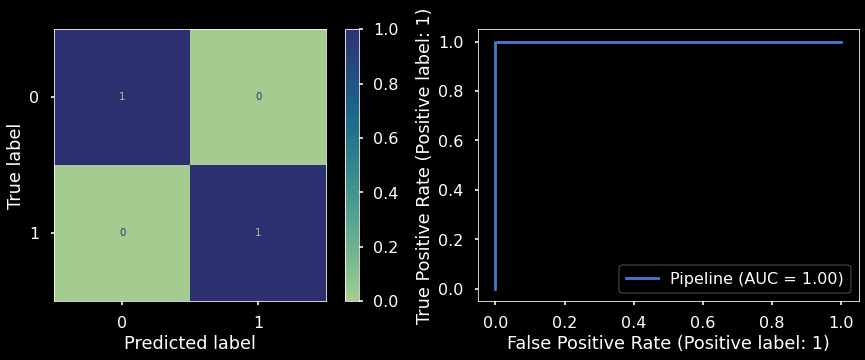

In [ ]:
# fit and evaluate a Random Forest Train Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_train,y_train, cmap='crest',
                         label='Best N-Estimator - Random Forest - Train Data')

<a name="6.14"></a>
## 📕 Observations and Recommendations

> Hyperparameters used for tuning:
  - Logistic Regression Model: Decision Threshold
  - KNN Model: n_neighbors
  - Random Forrest:n_estimators

>I am selecting Accuracy as the dataset is balanced, it works well with binary classification, and all models show high accuracy. Also F1 scores as type errors 1 and 2 are equally bad.

| MODEL                           | ACC TEST | ACC TRAIN | F1 TEST | F1 TRAIN |
| ------------------------------- | -------- | --------- | ------- | -------- |
| Logistics Regressor, Offset:0.5 | 0.96     | 0.92      | 0.97    | 0.93     |
| KNN, n_neighbors: 4             | 0.96     | 0.92      | 0.97    | 0.93     |
| Random Forest, n_estimator: 50  | 0.93     | 1.00      | 0.93    | 1.0      |




> for KNN and Random Forest models, F1 scores is the mean bewteen class 0 and class 1

> Logistic Regresor and KNN have similar performance, I am selecting KNN as this model works with regression and clasification problems, it is easy to understand and works well with multiclass clasifications models